# このnotebookについて

# 事前準備

In [96]:
import os
import json

import numpy as np
from tqdm import tqdm


In [97]:
# 自作モジュールの読み込み
from modules.file_format.HDF5 import HDF5Reader, HDF5Writer
from modules.file_format.NxsFile import NxsFile

In [98]:
"""pathの設定"""
import sys
repository_root = None
for sys_path in sys.path:
    if sys_path.endswith('LAMBDA-Melting'):
        repository_root = sys_path
if repository_root is None:
    raise ValueError('repository_root is not set')

"""plot用の設定"""
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['mathtext.fontset'] = 'cm'     #数式用のフォントejavuserif" or "cm"
plt.rcParams['xtick.direction'] = 'in'      #x軸の目盛線 #内in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'in'      #y軸の目盛線 #内in')か外向き('out')か双方向か('inout')
plt.rcParams['xtick.major.width'] = 1.0     #x軸主目盛り線の線幅
plt.rcParams['ytick.major.width'] = 1.0     #y軸主目盛り線の線幅
plt.rcParams['font.size'] = 14               #フォントの大きさ
plt.rcParams['axes.linewidth'] = 0.8        #軸の線幅edge linewidth。囲みの太さ
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = (8, 6)
# Arialフォントを設定
plt.rcParams.update({
    "font.family": "Arial",           # フォントをArialに設定
    "mathtext.fontset": "custom",     # カスタムフォントを指定
    "mathtext.rm": "Arial",           # 数式の通常テキスト部分
    "mathtext.it": "Arial",    # 数式のイタリック部分
    "mathtext.bf": "Arial"       # 数式の太字部分
})

# 読み込み先の設定

## 選んだRunを読み込み

In [99]:
# runの読み込み
# Run Selectorで選択したことを想定する
path_to_run_setting = os.path.join(repository_root, 'settings', 'run_selector.json')
with open(path_to_run_setting) as json_file:
    selected_run_setting = json.load(json_file)

In [100]:
selected_run_setting

{'data_root_path': '/Users/ishizawaosamu/work/MasterThesis/data',
 'current_run': 'OIbDia08_7th',
 'path_to_run_files': '/Users/ishizawaosamu/work/MasterThesis/data/BDD/OIbDia08/7th',
 'selected_files': {'Temperature': {'raw_radiation': 'OIbDia08_ 09.spe',
   'dist': 'OIbDia08_ 09_separate_half_p30e-2_dist.hdf'},
  'XRD': {'data': 'OIbDia08_9_00000.nxs',
   'calibration': 'pyFAI_calib2_MgS400_CeO2_240511.poni'}},
 'is_overwritten': True,
 'save_root_path': '/Users/ishizawaosamu/work/MasterThesis/save'}

## processed.hdfを読み込み

In [101]:
# up
up_hdf = HDF5Reader(file_path=os.path.join(
    selected_run_setting['save_root_path'],
    'processed_hdf',
    f'{selected_run_setting["current_run"]}_up_processed.hdf'
))

# down
down_hdf = HDF5Reader(file_path=os.path.join(
    selected_run_setting['save_root_path'],
    'processed_hdf',
    f'{selected_run_setting["current_run"]}_down_processed.hdf'
))

up_hdf.path_list

HDF5ファイルが見つかりました: /Users/ishizawaosamu/work/MasterThesis/save/processed_hdf/OIbDia08_7th_up_processed.hdf
HDF5ファイルが見つかりました: /Users/ishizawaosamu/work/MasterThesis/save/processed_hdf/OIbDia08_7th_down_processed.hdf


['entry/measured/error/T',
 'entry/measured/value/T',
 'entry/measured/value/frame_T',
 'entry/measured/value/max_position_T',
 'entry/params/frame/T',
 'entry/params/framerate/T',
 'entry/pwlf_fitting/segment_2/RSS',
 'entry/pwlf_fitting/segment_2/breakpoints_x',
 'entry/pwlf_fitting/segment_2/breakpoints_y',
 'entry/pwlf_fitting/segment_2/intercepts',
 'entry/pwlf_fitting/segment_2/slopes',
 'entry/pwlf_fitting/segment_3/RSS',
 'entry/pwlf_fitting/segment_3/breakpoints_x',
 'entry/pwlf_fitting/segment_3/breakpoints_y',
 'entry/pwlf_fitting/segment_3/intercepts',
 'entry/pwlf_fitting/segment_3/slopes',
 'entry/pwlf_fitting/segment_4/RSS',
 'entry/pwlf_fitting/segment_4/breakpoints_x',
 'entry/pwlf_fitting/segment_4/breakpoints_y',
 'entry/pwlf_fitting/segment_4/intercepts',
 'entry/pwlf_fitting/segment_4/slopes',
 'entry/pwlf_fitting/segment_5/RSS',
 'entry/pwlf_fitting/segment_5/breakpoints_x',
 'entry/pwlf_fitting/segment_5/breakpoints_y',
 'entry/pwlf_fitting/segment_5/intercepts',

## .nxsファイルなどを読み込み

In [102]:
# それぞれのpath
path_to_nxs = os.path.join(
    selected_run_setting['path_to_run_files'],
    selected_run_setting['selected_files']['XRD']['data']
)
path_to_poni = os.path.join(
    repository_root,
    'ref_data',
    'poni',
    selected_run_setting['selected_files']['XRD']['calibration']
)
path_to_mask = os.path.join(repository_root, 'ref_data', 'lambda_mask.npy') # FIXME: それぞれで指定か、poniに含める

In [103]:
nxs = NxsFile(
    nxs_path=path_to_nxs,
    poni_path=path_to_poni,
    mask_path=path_to_mask,
    run_name=selected_run_setting['current_run'],
)

HDF5ファイルが見つかりました: /Users/ishizawaosamu/work/MasterThesis/data/BDD/OIbDia08/7th/OIbDia08_9_00000.nxs
 > Set poni: /Users/ishizawaosamu/work/MasterThesis/LAMBDA-Melting/ref_data/poni/pyFAI_calib2_MgS400_CeO2_240511.poni
 > Set mask: /Users/ishizawaosamu/work/MasterThesis/LAMBDA-Melting/ref_data/lambda_mask.npy


# 保存

In [104]:
# 上書きするかどうかを設定
is_overwritten = selected_run_setting['is_overwritten']
is_overwritten

True

In [105]:
# 書き込み先の設定
# run_name_processed.hdfを作成する。すでにあればそれが読み込まれる
up_saved_hdf = HDF5Writer(
    file_path=os.path.join(
        selected_run_setting['save_root_path'],
        'processed_hdf',
        f'{selected_run_setting["current_run"]}_up_processed.hdf'
    )
)

down_saved_hdf = HDF5Writer(
    file_path=os.path.join(
        selected_run_setting['save_root_path'],
        'processed_hdf',
        f'{selected_run_setting["current_run"]}_down_processed.hdf'
    )
)

HDF5ファイルが見つかりました: /Users/ishizawaosamu/work/MasterThesis/save/processed_hdf/OIbDia08_7th_up_processed.hdf
HDF5ファイルが見つかりました: /Users/ishizawaosamu/work/MasterThesis/save/processed_hdf/OIbDia08_7th_down_processed.hdf


In [106]:
up_saved_hdf.path_list

['entry/measured/error/T',
 'entry/measured/value/T',
 'entry/measured/value/frame_T',
 'entry/measured/value/max_position_T',
 'entry/params/frame/T',
 'entry/params/framerate/T',
 'entry/pwlf_fitting/segment_2/RSS',
 'entry/pwlf_fitting/segment_2/breakpoints_x',
 'entry/pwlf_fitting/segment_2/breakpoints_y',
 'entry/pwlf_fitting/segment_2/intercepts',
 'entry/pwlf_fitting/segment_2/slopes',
 'entry/pwlf_fitting/segment_3/RSS',
 'entry/pwlf_fitting/segment_3/breakpoints_x',
 'entry/pwlf_fitting/segment_3/breakpoints_y',
 'entry/pwlf_fitting/segment_3/intercepts',
 'entry/pwlf_fitting/segment_3/slopes',
 'entry/pwlf_fitting/segment_4/RSS',
 'entry/pwlf_fitting/segment_4/breakpoints_x',
 'entry/pwlf_fitting/segment_4/breakpoints_y',
 'entry/pwlf_fitting/segment_4/intercepts',
 'entry/pwlf_fitting/segment_4/slopes',
 'entry/pwlf_fitting/segment_5/RSS',
 'entry/pwlf_fitting/segment_5/breakpoints_x',
 'entry/pwlf_fitting/segment_5/breakpoints_y',
 'entry/pwlf_fitting/segment_5/intercepts',

## パラメータ

In [107]:
# パラメータの確認
nxs.fps, nxs.frame_num, nxs.ai.wavelength

(np.float64(200.0), 4000, 4.14285878331e-11)

In [108]:
for saved_hdf in [up_saved_hdf, down_saved_hdf]:
    saved_hdf.write(data_path='entry/params/frame/XRD', data=nxs.frame_num, overwrite=is_overwritten)
    saved_hdf.write(data_path='entry/params/framerate/XRD', data=nxs.fps, overwrite=is_overwritten)
    saved_hdf.write(data_path='entry/params/x-ray_wavelength', data=nxs.ai.wavelength, overwrite=is_overwritten)

書き込みに成功しました: 'entry/params/frame/XRD' in /Users/ishizawaosamu/work/MasterThesis/save/processed_hdf/OIbDia08_7th_up_processed.hdf
書き込みに成功しました: 'entry/params/framerate/XRD' in /Users/ishizawaosamu/work/MasterThesis/save/processed_hdf/OIbDia08_7th_up_processed.hdf
書き込みに成功しました: 'entry/params/x-ray_wavelength' in /Users/ishizawaosamu/work/MasterThesis/save/processed_hdf/OIbDia08_7th_up_processed.hdf
書き込みに成功しました: 'entry/params/frame/XRD' in /Users/ishizawaosamu/work/MasterThesis/save/processed_hdf/OIbDia08_7th_down_processed.hdf
書き込みに成功しました: 'entry/params/framerate/XRD' in /Users/ishizawaosamu/work/MasterThesis/save/processed_hdf/OIbDia08_7th_down_processed.hdf
書き込みに成功しました: 'entry/params/x-ray_wavelength' in /Users/ishizawaosamu/work/MasterThesis/save/processed_hdf/OIbDia08_7th_down_processed.hdf


## 配列と1d積算データ

In [109]:
# frame配列を作っておく
frame_array = np.arange(nxs.frame_num)

# tth(two theta)配列を取得
tth = nxs.get_tth()

# time_arrを取得
time_array = frame_array / nxs.fps # ここでは保存しない

In [110]:
# 配列の保存
for saved_hdf in [up_saved_hdf, down_saved_hdf]:
    saved_hdf.write(data_path='entry/measured/value/tth', data=tth, overwrite=is_overwritten)
    saved_hdf.write(data_path='entry/measured/value/frame_XRD', data=frame_array, overwrite=is_overwritten)

書き込みに成功しました: 'entry/measured/value/tth' in /Users/ishizawaosamu/work/MasterThesis/save/processed_hdf/OIbDia08_7th_up_processed.hdf
書き込みに成功しました: 'entry/measured/value/frame_XRD' in /Users/ishizawaosamu/work/MasterThesis/save/processed_hdf/OIbDia08_7th_up_processed.hdf
書き込みに成功しました: 'entry/measured/value/tth' in /Users/ishizawaosamu/work/MasterThesis/save/processed_hdf/OIbDia08_7th_down_processed.hdf
書き込みに成功しました: 'entry/measured/value/frame_XRD' in /Users/ishizawaosamu/work/MasterThesis/save/processed_hdf/OIbDia08_7th_down_processed.hdf


In [111]:
# 1次元パターンを取得
pattern = []

for frame in tqdm(range(nxs.frame_num)):
    pattern.append(nxs.get_1d_pattern_data(frame))

pattern = np.array(pattern)

100%|██████████| 4000/4000 [00:38<00:00, 104.92it/s]


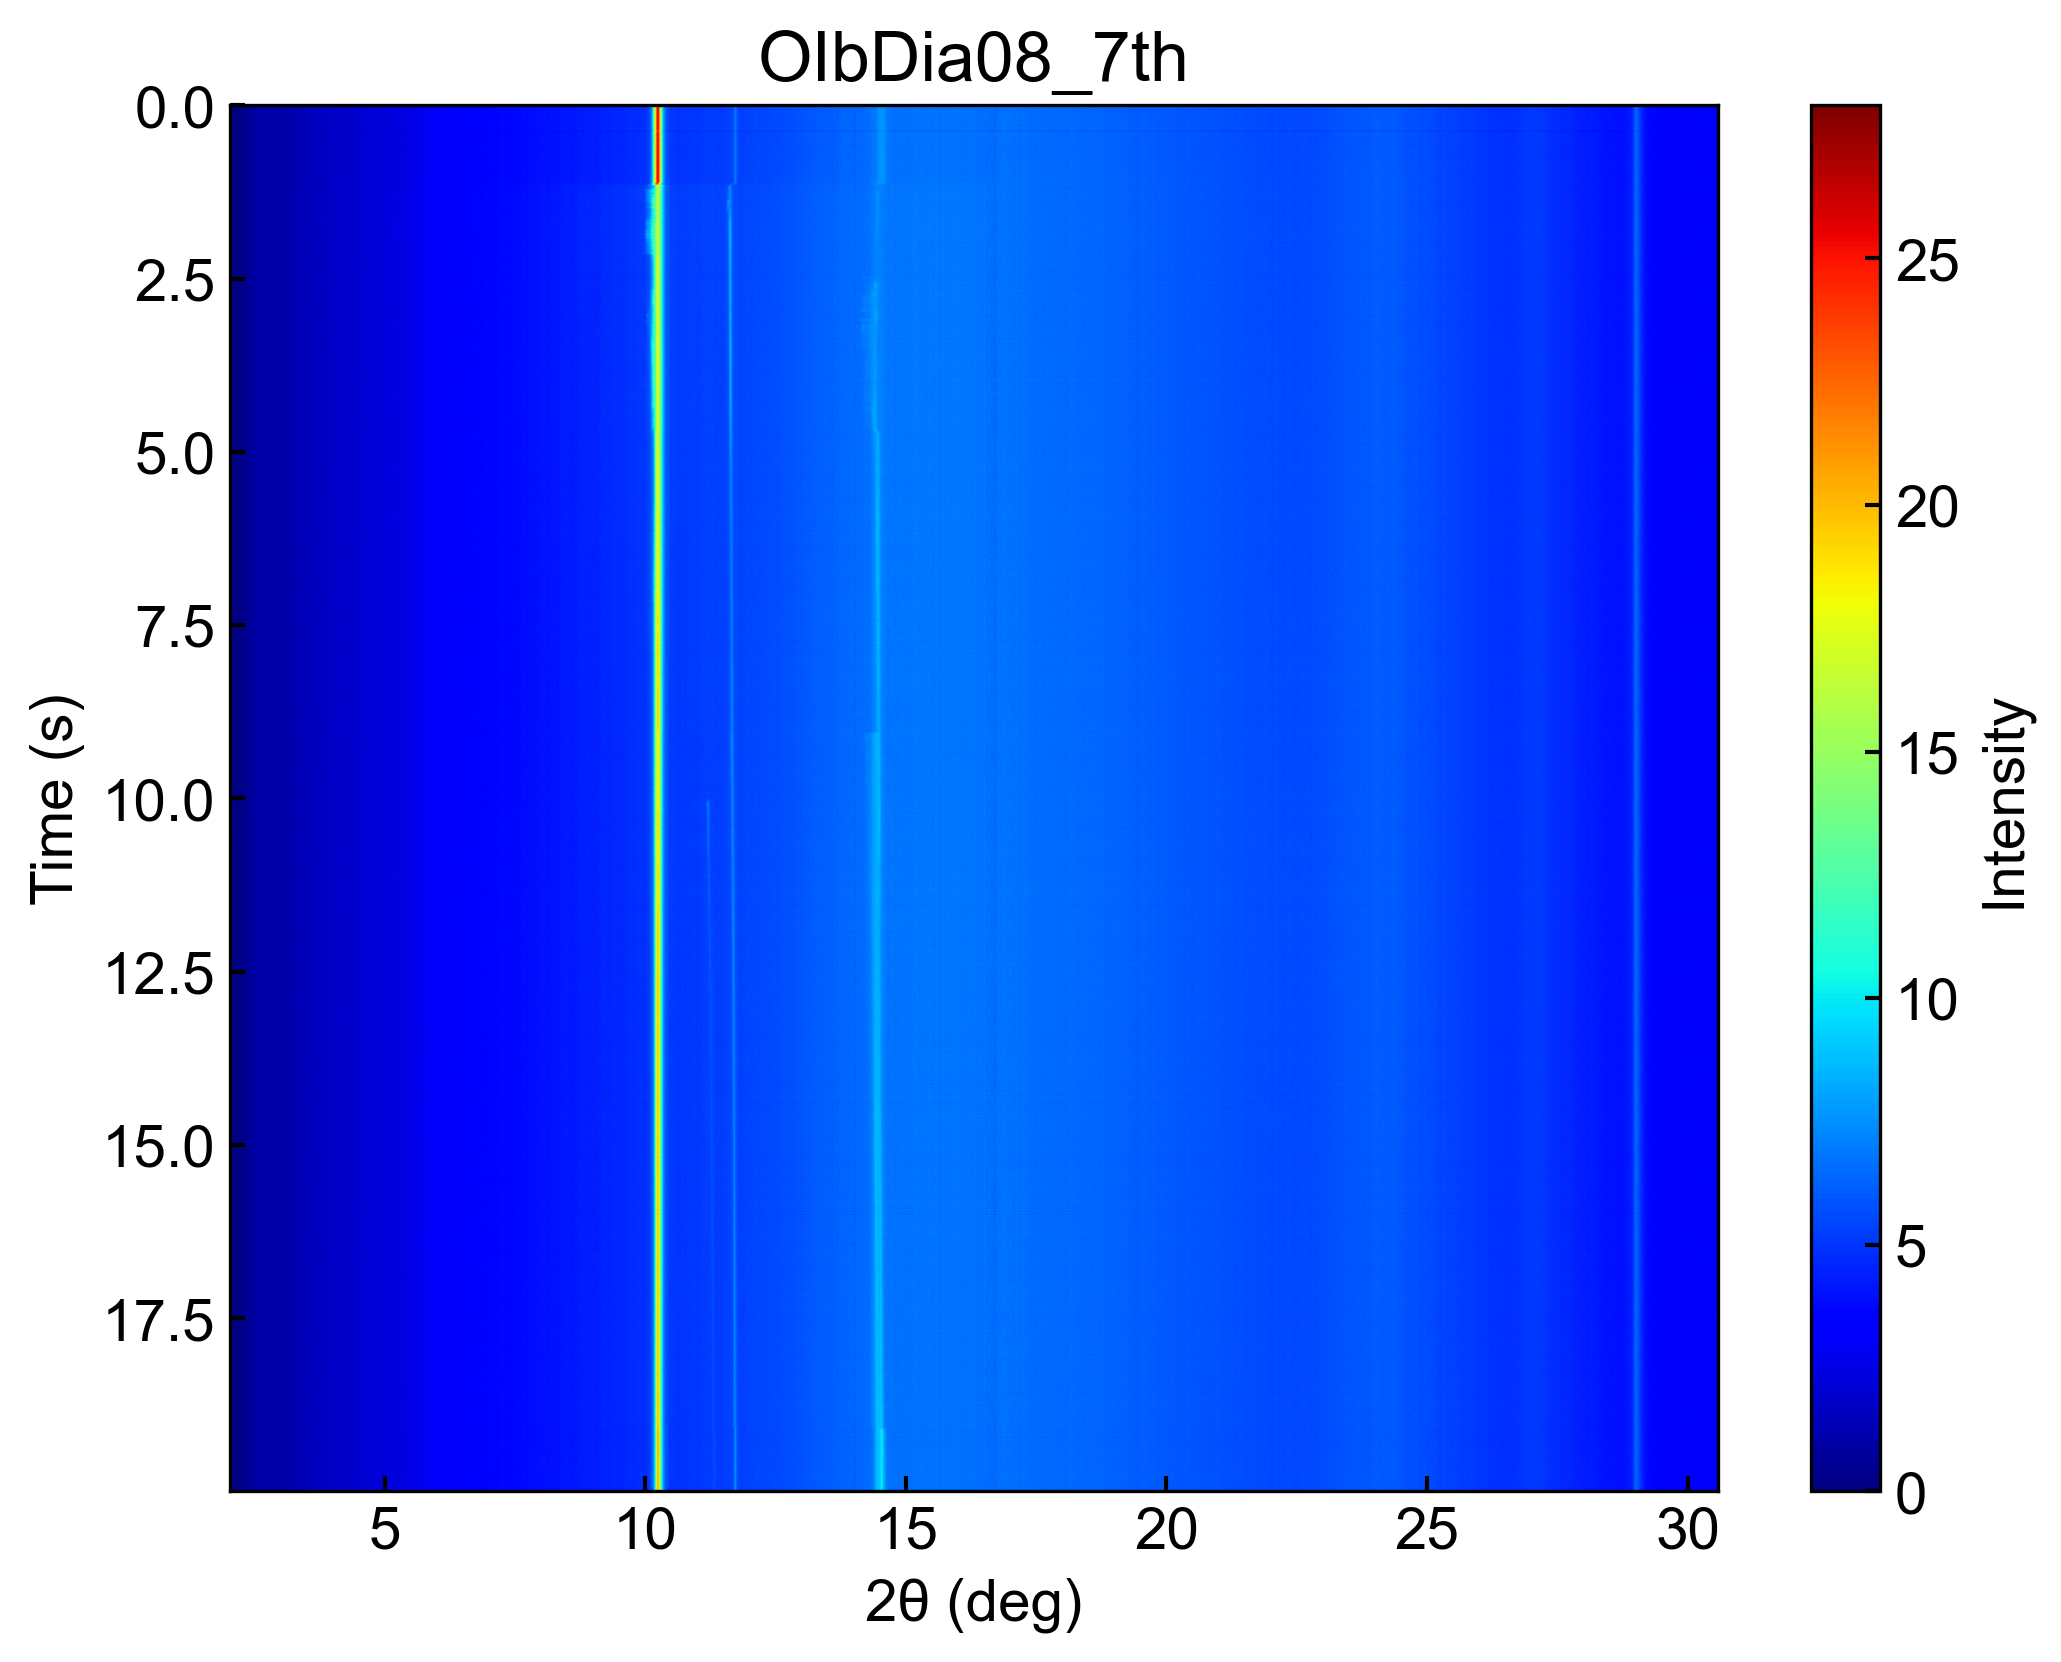

In [112]:
# 図示して確認
plt.imshow(pattern, aspect='auto', cmap='jet',
           extent=[tth.min(), tth.max(), time_array.max(), time_array.min()])
plt.xlabel('2θ (deg)')
plt.ylabel('Time (s)')
plt.colorbar(label='Intensity')
plt.title(selected_run_setting['current_run'])

plt.savefig(os.path.join(selected_run_setting['save_root_path'], 'fig', 'xrd_1d_pattern', selected_run_setting['current_run']+'.png'))
plt.show()
plt.close()

In [113]:
for saved_hdf in [up_saved_hdf, down_saved_hdf]:
    saved_hdf.write(data_path='entry/measured/value/pattern', data=pattern, overwrite=is_overwritten)

書き込みに成功しました: 'entry/measured/value/pattern' in /Users/ishizawaosamu/work/MasterThesis/save/processed_hdf/OIbDia08_7th_up_processed.hdf
書き込みに成功しました: 'entry/measured/value/pattern' in /Users/ishizawaosamu/work/MasterThesis/save/processed_hdf/OIbDia08_7th_down_processed.hdf


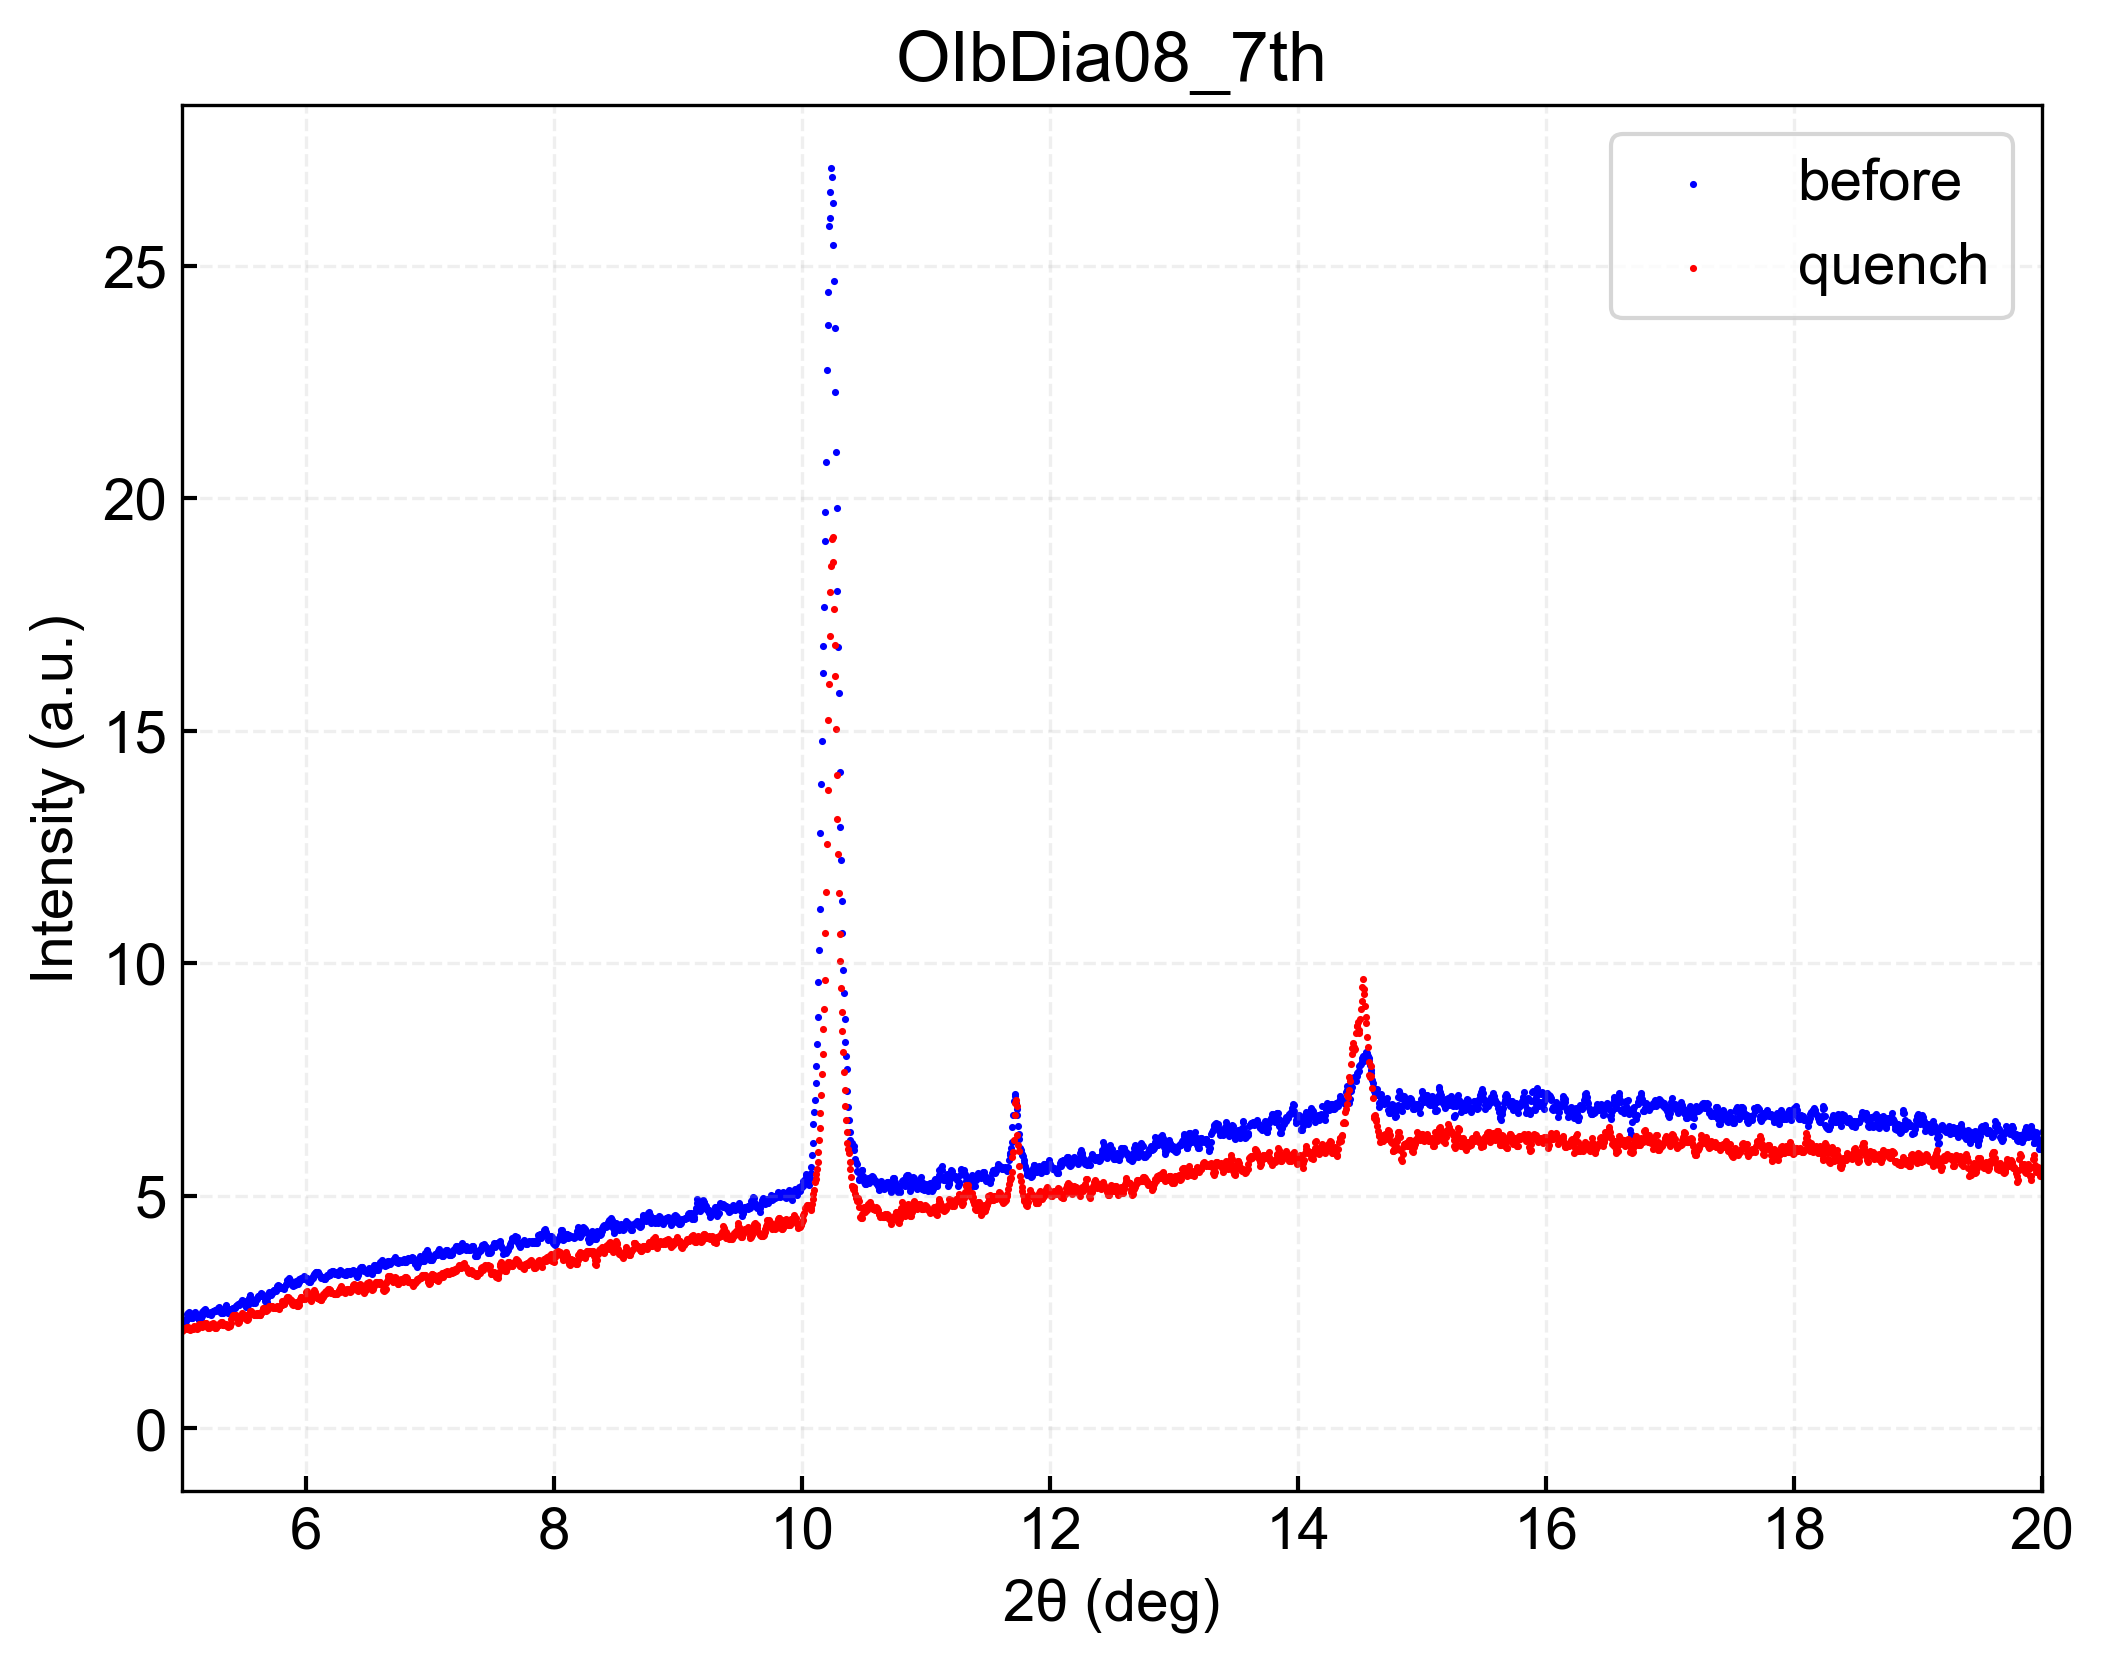

In [114]:
# plotも確認
plt.scatter(tth, pattern[1], color='blue', s=0.5, label='before')
plt.scatter(tth, pattern[-1], color='red', s=0.5, label='quench')
plt.xlabel('2θ (deg)')
plt.ylabel('Intensity (a.u.)')
plt.title(selected_run_setting['current_run'])
plt.grid(alpha=0.2, linestyle='--')
plt.legend()
plt.xlim(5, 20)
plt.savefig(os.path.join(selected_run_setting['save_root_path'], 'fig', 'xrd_1d_before_after', selected_run_setting['current_run']+'.png'))
plt.show()
plt.close()
